# Breast Cancer Predition

In this project, I have used the **Breast Cancer Prediction** dataset which I obtained from **Kaggle.com**.(https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset)

The dataset contain 6 columns including the **diagnosis** column which we have to predict. 

We will be using the **Support Vector Machine (SVM)** for this classification problem.

For evaluation, we will be looking at the **accuracy** of the model, but more importantly, our aim in this project is to minimize the number of **false negative** cases i.e. **to minimize the number of patients who HAVE cancer but were predicted by the model as NOT having cancer**. We will do this by looking at the **confusion matrix**. 

## Importing The Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing The Dataset

In [5]:
df = pd.read_csv('Breast_cancer_data.csv')

In [6]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


## Analysing the dataset

In [7]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


From the above table, we can see that the dataset has **no Null values**

We will now look at the number of positive as well as the negative cases to check if the dataset is **unbalanced**.

In [9]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

Looking at the above count, we can conclude that the dataset is not **unbalanced**

Now we will make some graphs to look for trend and dependencies of the output variable i.e. **diagnosis** with the other features.

<AxesSubplot:xlabel='diagnosis'>

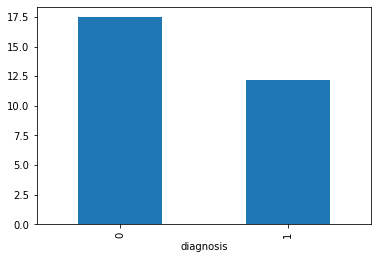

In [10]:
df.groupby(by = 'diagnosis')['mean_radius'].mean().plot.bar()

Text(0.5, 1.0, 'mean_radius vs diagnosis')

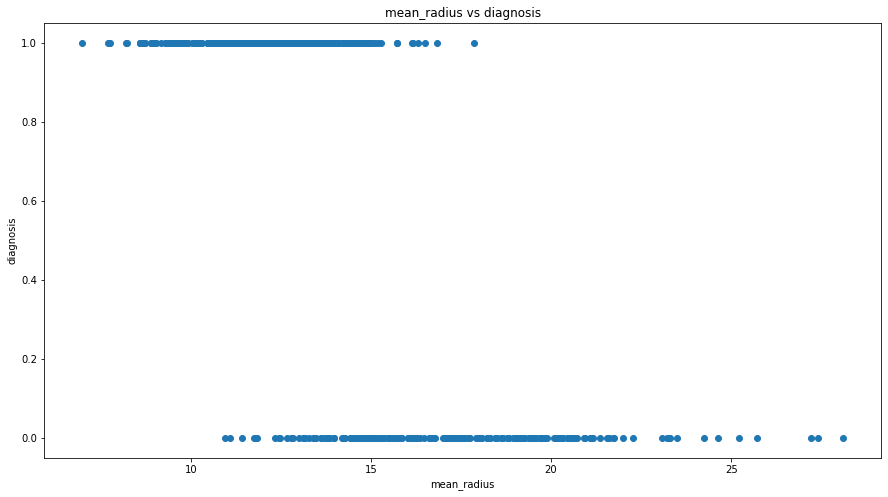

In [11]:
plt.figure(figsize = (15,8))
plt.scatter(df['mean_radius'],df['diagnosis'])
plt.xlabel('mean_radius')
plt.ylabel('diagnosis')
plt.title('mean_radius vs diagnosis')

The above two plot shows that patients **NOT** having cancer have larger value of **mean_radius** and patients who **HAVE** cancer have relatively low value of **mean_radius.**

<AxesSubplot:xlabel='diagnosis'>

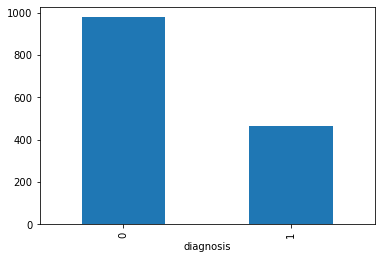

In [12]:
df.groupby(by = 'diagnosis')['mean_area'].mean().plot.bar()

Text(0.5, 1.0, 'mean_area vs diagnosis')

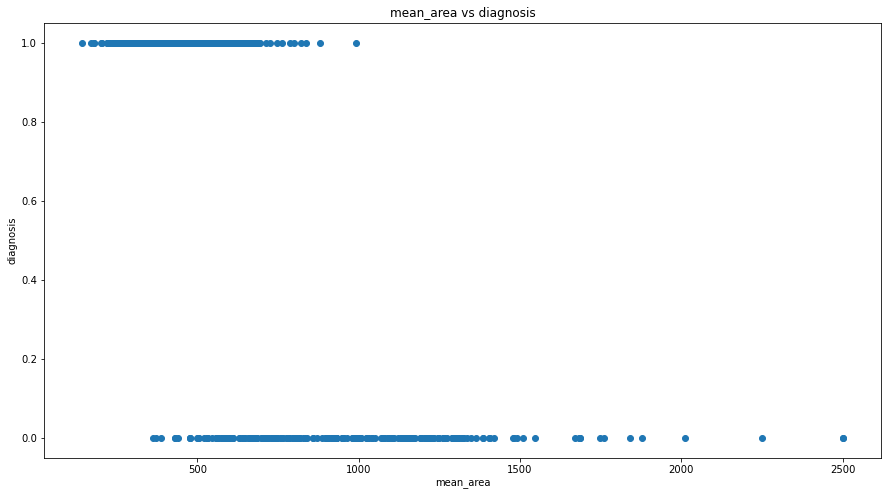

In [13]:
plt.figure(figsize = (15,8))
plt.scatter(df['mean_area'],df['diagnosis'])
plt.xlabel('mean_area')
plt.ylabel('diagnosis')
plt.title('mean_area vs diagnosis')

The above two plot shows that patients **NOT** having cancer have larger value of **mean_area** and patients who **HAVE** cancer have relatively low value of **mean_area.**

<AxesSubplot:xlabel='diagnosis'>

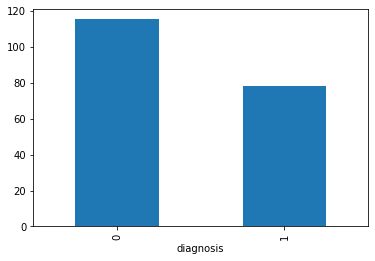

In [14]:
df.groupby(by = 'diagnosis')['mean_perimeter'].mean().plot.bar()

Text(0, 0.5, 'diagnosis')

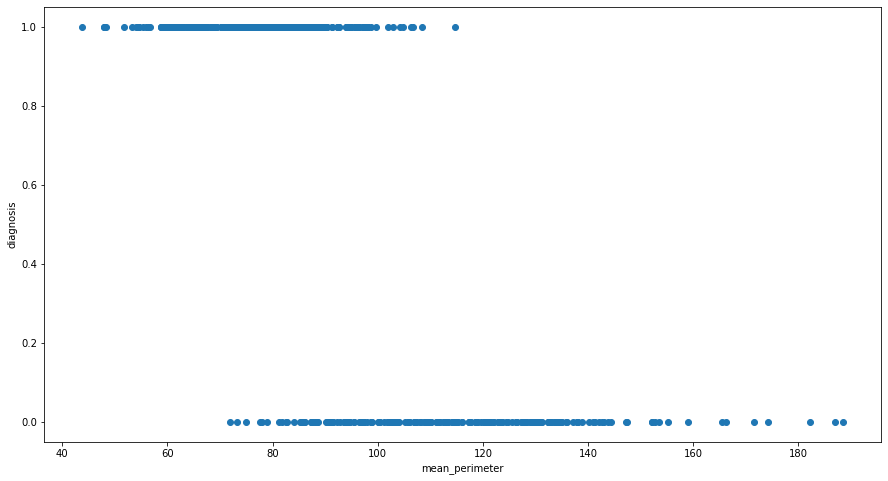

In [15]:
plt.figure(figsize = (15,8))
plt.scatter(df['mean_perimeter'],df['diagnosis'])
plt.xlabel('mean_perimeter')
plt.ylabel('diagnosis')

The above two plot shows that patients **NOT** having cancer have larger value of **mean_perimeter** and patients who **HAVE** cancer have relatively low value of **mean_perimeter.**

<AxesSubplot:xlabel='diagnosis'>

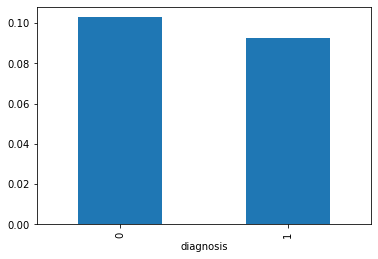

In [16]:
df.groupby(by = 'diagnosis')['mean_smoothness'].mean().plot.bar()

The above bar plot shows that patients who **have** and those who **don't** have similar mean value of **mean_smoothness**.

Text(0, 0.5, 'diagnosis')

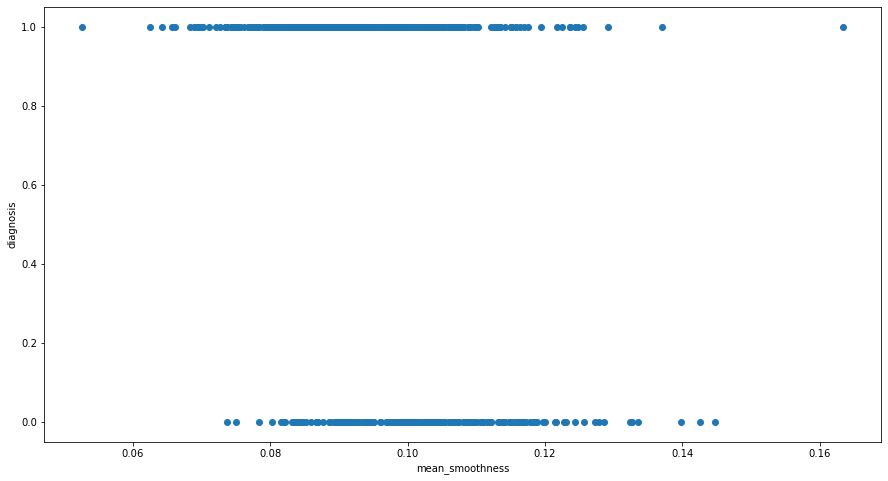

In [17]:
plt.figure(figsize = (15,8))
plt.scatter(df['mean_smoothness'],df['diagnosis'])
plt.xlabel('mean_smoothness')
plt.ylabel('diagnosis')

The above scatter plot shows that for **diagnosis = 1 and diagonsis = 0**, the values of **mean_smoothness** is almost similar with **diagnosis = 1** having some **large** as well as **very low** value of **mean_smoothness** for a couple of patients.

<AxesSubplot:xlabel='diagnosis'>

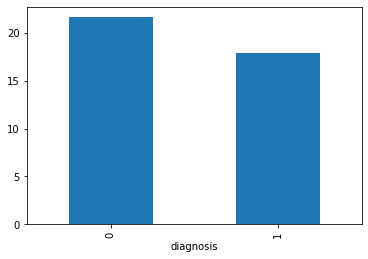

In [18]:
df.groupby(by = 'diagnosis')['mean_texture'].mean().plot.bar()

The above bar plot shows that patients who **have** and those who **don't** have similar mean value of **mean_texture**.

Text(0, 0.5, 'diagnosis')

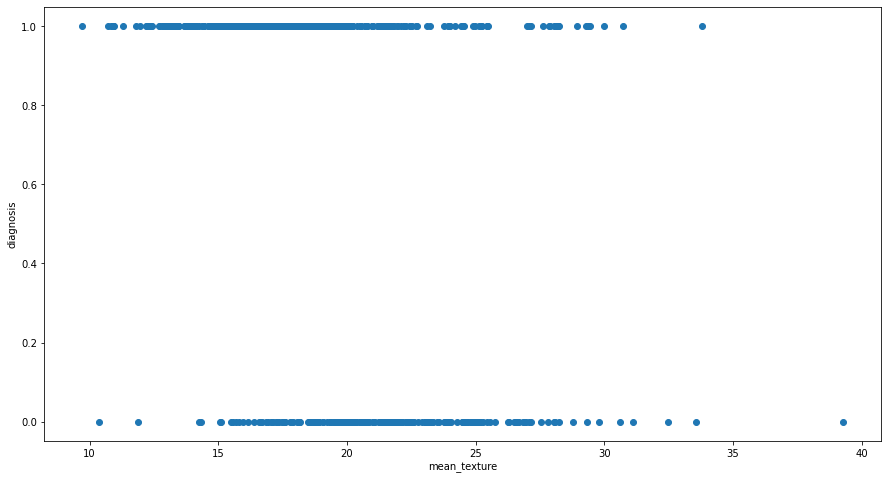

In [19]:
plt.figure(figsize = (15,8))
plt.scatter(df['mean_texture'],df['diagnosis'])
plt.xlabel('mean_texture')
plt.ylabel('diagnosis')

The above scatter plot shows that for **diagnosis = 1 and diagonsis = 0**, the values of **mean_texture** is almost similar with **diagnosis = 1** having some **large** as well as **very low** value of **mean_texture** for a couple of patients.

Now we wil look at the distribution of each **feature with and without Log Transformation**.

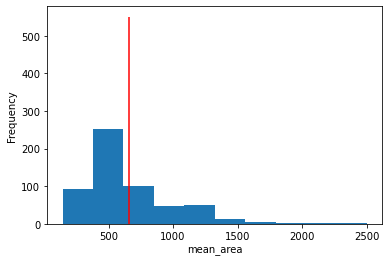

In [20]:
df['mean_area'].plot.hist()
plt.xlabel('mean_area')
plt.vlines(df['mean_area'].mean(),0,df['mean_area'].median(),color = 'red')

<AxesSubplot:ylabel='Frequency'>

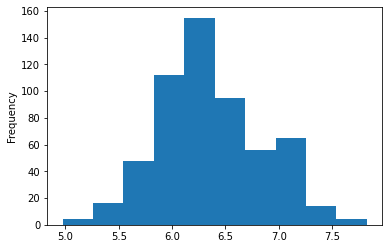

In [21]:
np.log(df['mean_area']+1).plot.hist()


We can see that **mean_area** is **normally distributed** after **Log Transformation**.

Text(0.5, 0, 'mean_perimeter')

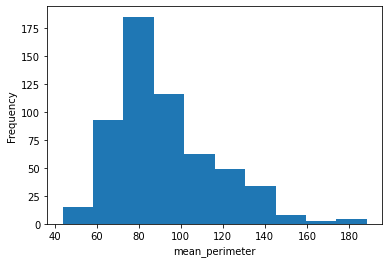

In [22]:
df['mean_perimeter'].plot.hist()
plt.xlabel('mean_perimeter')

<AxesSubplot:ylabel='Frequency'>

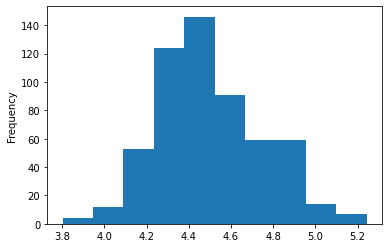

In [23]:
np.log(df['mean_perimeter']+1).plot.hist()

We can see that **mean_perimeter** after Log Transformation is **normally distributed**.

Text(0.5, 0, 'mean_radius')

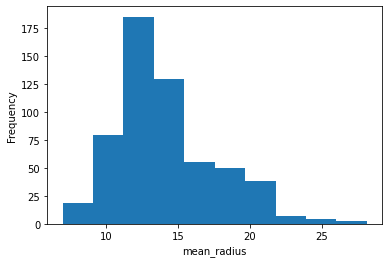

In [24]:
df['mean_radius'].plot.hist()
plt.xlabel('mean_radius')

<AxesSubplot:ylabel='Frequency'>

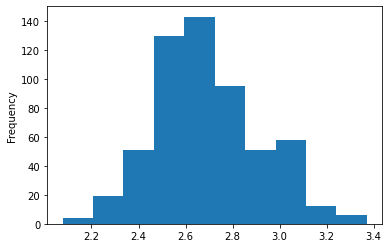

In [25]:
np.log(df['mean_radius']+1).plot.hist()

We can see that **mean_radius** is almost **normally distributed** after **Log Transformation**

Text(0.5, 0, 'mean_smoothness')

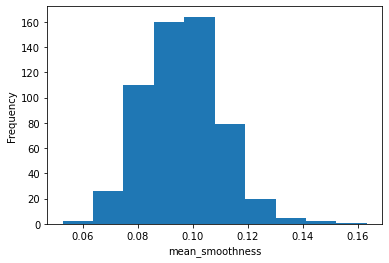

In [26]:
df['mean_smoothness'].plot.hist()
plt.xlabel('mean_smoothness')

<AxesSubplot:ylabel='Frequency'>

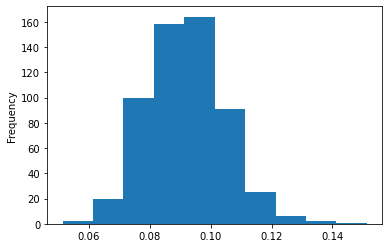

In [27]:
np.log(df['mean_smoothness']+1).plot.hist()

**mean_smoothness** is **normally distributed** **with and without Log Transformation**

Text(0.5, 0, 'mean_texture')

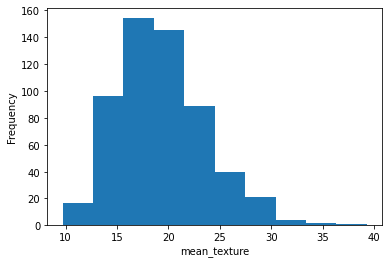

In [28]:
df['mean_texture'].plot.hist()
plt.xlabel('mean_texture')

<AxesSubplot:ylabel='Frequency'>

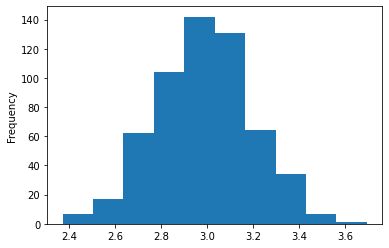

In [29]:
np.log(df['mean_texture']+1).plot.hist()

**mean_texture** is **normally distributed** after **Log Transformation**

## Data Preprocessing

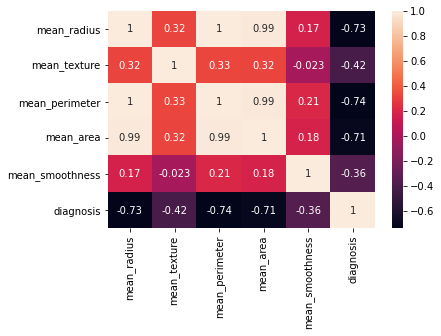

In [19]:
corr = df.corr()
sns.heatmap(corr, annot = True)

From the above **heatmap**, we can see that **mean_radius**, **mean_area** and **mean_perimeter** are **highly correlated**, so we will drop **mean_area** and **mean_radius** from our dataset.

In [20]:
df.drop(['mean_area','mean_radius'],axis = 1,inplace = True)

In [21]:
df

,mean_texture,mean_perimeter,mean_smoothness,diagnosis
0,10.38,122.80,0.11840,0
1,17.77,132.90,0.08474,0
2,21.25,130.00,0.10960,0
3,20.38,77.58,0.14250,0
4,14.34,135.10,0.10030,0
...,...,...,...,...
564,22.39,142.00,0.11100,0
565,28.25,131.20,0.09780,0
566,28.08,108.30,0.08455,0
567,29.33,140.10,0.11780,0


From the **Exploratory Data Analysis**, we see that all the features have **normal distribution** after **Log Transformation**.
So now we will create a function called **log_transform** which will take in our dataset and return the **Log Transformed dataset**.

In [25]:
def log_transform(data):
    df = data.copy()
    df = df.iloc[:,:-1]
    for cols in df.columns:
        df[cols] = np.log(df[cols]+1)
    return df    

## Performing Log Transformation on the dataset

In [33]:
df_2 = log_transform(df)

In [34]:
df_2

,mean_texture,mean_perimeter,mean_smoothness
0,2.431857,4.818667,0.111899
1,2.932260,4.897093,0.081340
2,3.102342,4.875197,0.104000
3,3.062456,4.364117,0.133219
4,2.730464,4.913390,0.095583
...,...,...,...
564,3.152309,4.962845,0.105261
565,3.375880,4.884316,0.093308
566,3.370051,4.694096,0.081165
567,3.412137,4.949469,0.111362


## Splitting the dataset into training and test set

Before splitting the dataset, first we will divide the **Log Transformed** dataset into **X** and **Y** which represents the **features** and the **output label** respectively.

In [35]:
X = df_2.values
Y = df['diagnosis'].values

Now we will split the **X** and **Y** into **training and test** set using **train_test_split()** method of the **sklearn** library.

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

## Feature Scaling

We will now scale the feature datasets using **StandardScaler** technique.

Here for each feature, the values will be scaled such that the mean of the resultant feature will be zero with unit variance i.e.
for each feature, each value will be scaled using the formula:
                      `z = (x-u)/s`   , where **x** is a particular value of a feature, **u** is the **mean** of the feature and **s** is the **standard deviation**.

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Training the Kernel SVM model 

We will now use the **SVM classifier** to train our model on the training dataset. 

We will use the **Radial Basis Function (RBF) Kernel** which will use **non-linear boundaries** to classify the data.

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train,y_train)

SVC()

## Using the trained model on the test data and Evaluating the results

We will use the confusion matrix which will give us the values of **false negative , false positive , true negative and true positives**.

In [41]:
y_pred = classifier_7.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[36  5]
 [ 0 73]]


0.956140350877193

We have obtained an accuracy of almost **96%** using the kernel SVM classifier.

But more importantly, there are **ZERO false negatives** as seen from the **confusion matrix**.




This concludes this project. We build a classifier model using the kernel SVM on the breast cancer dataset obtained from kaggle.com.
